In [19]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('newly-funded-artificial-intelligence-companies.csv')

# Keep only China and USA
df = df[df['Entity'].isin(['China', 'United States'])]

# Keep only years between 2015 and 2024
df = df[df['Year'].between(2015, 2024)]

# Reset index (optional)
df = df.reset_index(drop=True)

df.head()


,Entity,Code,Year,Newly founded AI companies
0,China,CHN,2015,72
1,China,CHN,2016,69
2,China,CHN,2017,92
3,China,CHN,2018,205
4,China,CHN,2019,217


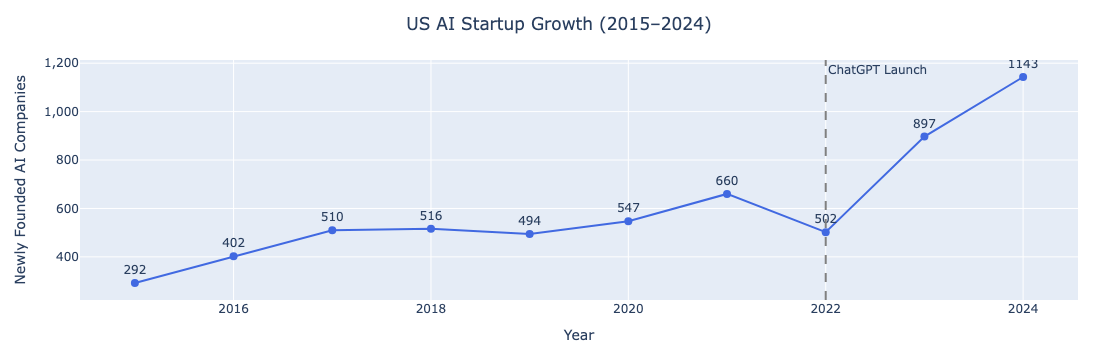

In [20]:
# Filter only the US
usa = df[df['Entity'] == 'United States'].copy()

# Create a single continuous line chart
fig = go.Figure(go.Scatter(
    x=usa['Year'],
    y=usa['Newly founded AI companies'],
    mode='lines+markers+text',
    name='United States',
    text=usa['Newly founded AI companies'],
    textposition='top center',
    line=dict(color='royalblue'),
    marker=dict(size=8)
))

# Add a vertical line to mark ChatGPT's release (late 2022)
fig.add_vline(
    x=2022,
    line_dash="dash",
    line_color="gray",
    annotation_text="ChatGPT Launch",
    annotation_position="top right"
)

# Layout settings
fig.update_layout(
    title='US AI Startup Growth (2015–2024)',
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Newly Founded AI Companies',
    yaxis=dict(tickformat=','),
    height=500,
    margin=dict(t=60, b=60, l=80, r=40),
    showlegend=False
)

fig.show()

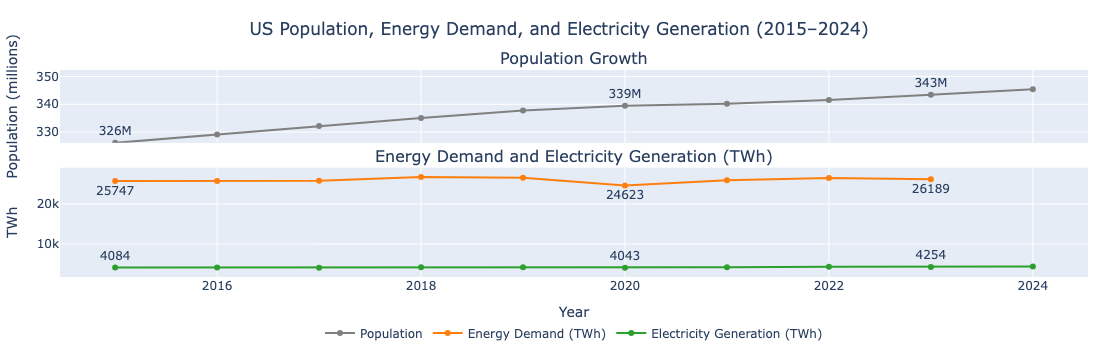

In [36]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data
df = pd.read_csv('owid-energy-data.csv')

# Filter for US and relevant years
us = df[(df['country'] == 'United States') & (df['year'].between(2015, 2024))].copy()

# Define label mask (only label 2015, 2020, 2024)
key_years = [2015, 2020, 2023]
us['label_mask'] = us['year'].isin(key_years)

# Create subplot figure (2 rows)
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    row_heights=[0.4, 0.6],
    vertical_spacing=0.12,
    subplot_titles=(
        'Population Growth',
        'Energy Demand and Electricity Generation (TWh)'
    )
)

# --- Subplot 1: Population (millions) ---
fig.add_trace(go.Scatter(
    x=us['year'],
    y=us['population'] / 1e6,
    name='Population',
    mode='lines+markers+text',
    text=[f"{p/1e6:.0f}M" if k else "" for p, k in zip(us['population'], us['label_mask'])],
    textposition='top center',
    line=dict(color='gray')
), row=1, col=1)

# --- Subplot 2: Energy Demand ---
fig.add_trace(go.Scatter(
    x=us['year'],
    y=us['primary_energy_consumption'],
    name='Energy Demand (TWh)',
    mode='lines+markers+text',
    text=[f"{e:.0f}" if k else "" for e, k in zip(us['primary_energy_consumption'], us['label_mask'])],
    textposition='bottom center',
    line=dict(color='#ff7f0e')  # deep orange
), row=2, col=1)

# --- Subplot 2: Electricity Generation ---
fig.add_trace(go.Scatter(
    x=us['year'],
    y=us['electricity_generation'],
    name='Electricity Generation (TWh)',
    mode='lines+markers+text',
    text=[f"{g:.0f}" if k else "" for g, k in zip(us['electricity_generation'], us['label_mask'])],
    textposition='top center',
    line=dict(color='#2ca02c')  # strong green
), row=2, col=1)

# --- Layout ---
fig.update_layout(
    title='US Population, Energy Demand, and Electricity Generation (2015–2024)',
    title_x=0.5,
    height=600,
    legend=dict(orientation='h', x=0.5, xanchor='center', y=-0.2),
    margin=dict(t=70, b=80, l=60, r=30),
)

fig.update_yaxes(
    title_text="Population (millions)",
    row=1, col=1,
    rangemode='tozero',
    range=[us['population'].min() / 1e6, us['population'].max() / 1e6 * 1.02]  # Add 5% padding
)

fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="TWh", row=2, col=1)

fig.show()

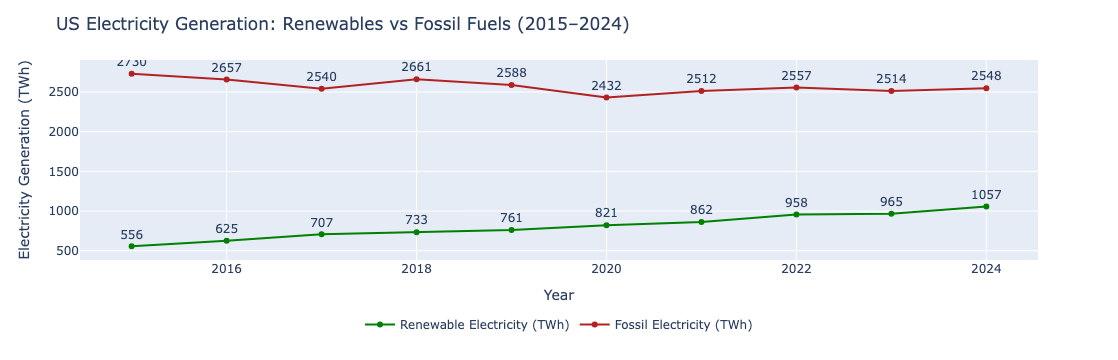

In [25]:
# Filter US again
us = df[(df['country'] == 'United States') & (df['year'].between(2015, 2024))].copy()

# Clean values just in case
us = us[['year', 'renewables_electricity', 'fossil_electricity']].dropna()

# Create the figure
fig = go.Figure()

# Renewable electricity generation
fig.add_trace(go.Scatter(
    x=us['year'],
    y=us['renewables_electricity'],
    name='Renewable Electricity (TWh)',
    mode='lines+markers+text',
    text=us['renewables_electricity'].round(0),
    textposition='top center',
    line=dict(color='green')
))

# Fossil fuel electricity generation
fig.add_trace(go.Scatter(
    x=us['year'],
    y=us['fossil_electricity'],
    name='Fossil Electricity (TWh)',
    mode='lines+markers+text',
    text=us['fossil_electricity'].round(0),
    textposition='top center',
    line=dict(color='firebrick')
))

# Layout
fig.update_layout(
    title='US Electricity Generation: Renewables vs Fossil Fuels (2015–2024)',
    xaxis_title='Year',
    yaxis_title='Electricity Generation (TWh)',
    legend=dict(orientation='h', x=0.5, xanchor='center', y=-0.25),
    height=500,
    margin=dict(t=60, b=100)
)

fig.show()